In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("iris.csv")
data

,sepal length(cm),sepal width (cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.isnull().sum()

sepal length(cm)    0
sepal width (cm)    0
petal length(cm)    0
petal width(cm)     0
class               0
dtype: int64

In [4]:
data.describe()

,sepal length(cm),sepal width (cm),petal length(cm),petal width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.corr()

,sepal length(cm),sepal width (cm),petal length(cm),petal width(cm)
sepal length(cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length(cm),0.871754,-0.420516,1.000000,0.962757
petal width(cm),0.817954,-0.356544,0.962757,1.000000


In [6]:
data["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
lab = LabelEncoder()

In [9]:
data["class"] = lab.fit_transform(data["class"])

In [10]:
data.tail()

,sepal length(cm),sepal width (cm),petal length(cm),petal width(cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [11]:
x = data.drop('class',axis=1)
y = data['class']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [13]:
rf = RandomForestClassifier(random_state=1)

In [14]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [15]:
y_pred = rf.predict(x_test)
print(y_pred)

[0 0 0 2 2 2 2 1 2 2 2 1 0 0 2 2 1 1 1 0 2 1 1 1 2 1 2 0 2 1 0 2 1 2 2 0 2
 1]


In [16]:
print(lab.inverse_transform(y_pred))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']


In [20]:
pred = list(map(float,input("Enter the feature values:").split()))
pred = np.array([pred])
pred_values = rf.predict(pred)
print(pred_values)
print(lab.inverse_transform(pred_values))

Enter the feature values:6.2 3.4	5.4 2.3
[2]
['Iris-virginica']


C:\Users\saite\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13  0  0]
 [ 0 13  0]
 [ 0  2 10]]


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      1.00      0.93        13
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



In [36]:
print((accuracy_score(y_test,y_pred))*100)

94.73684210526315


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

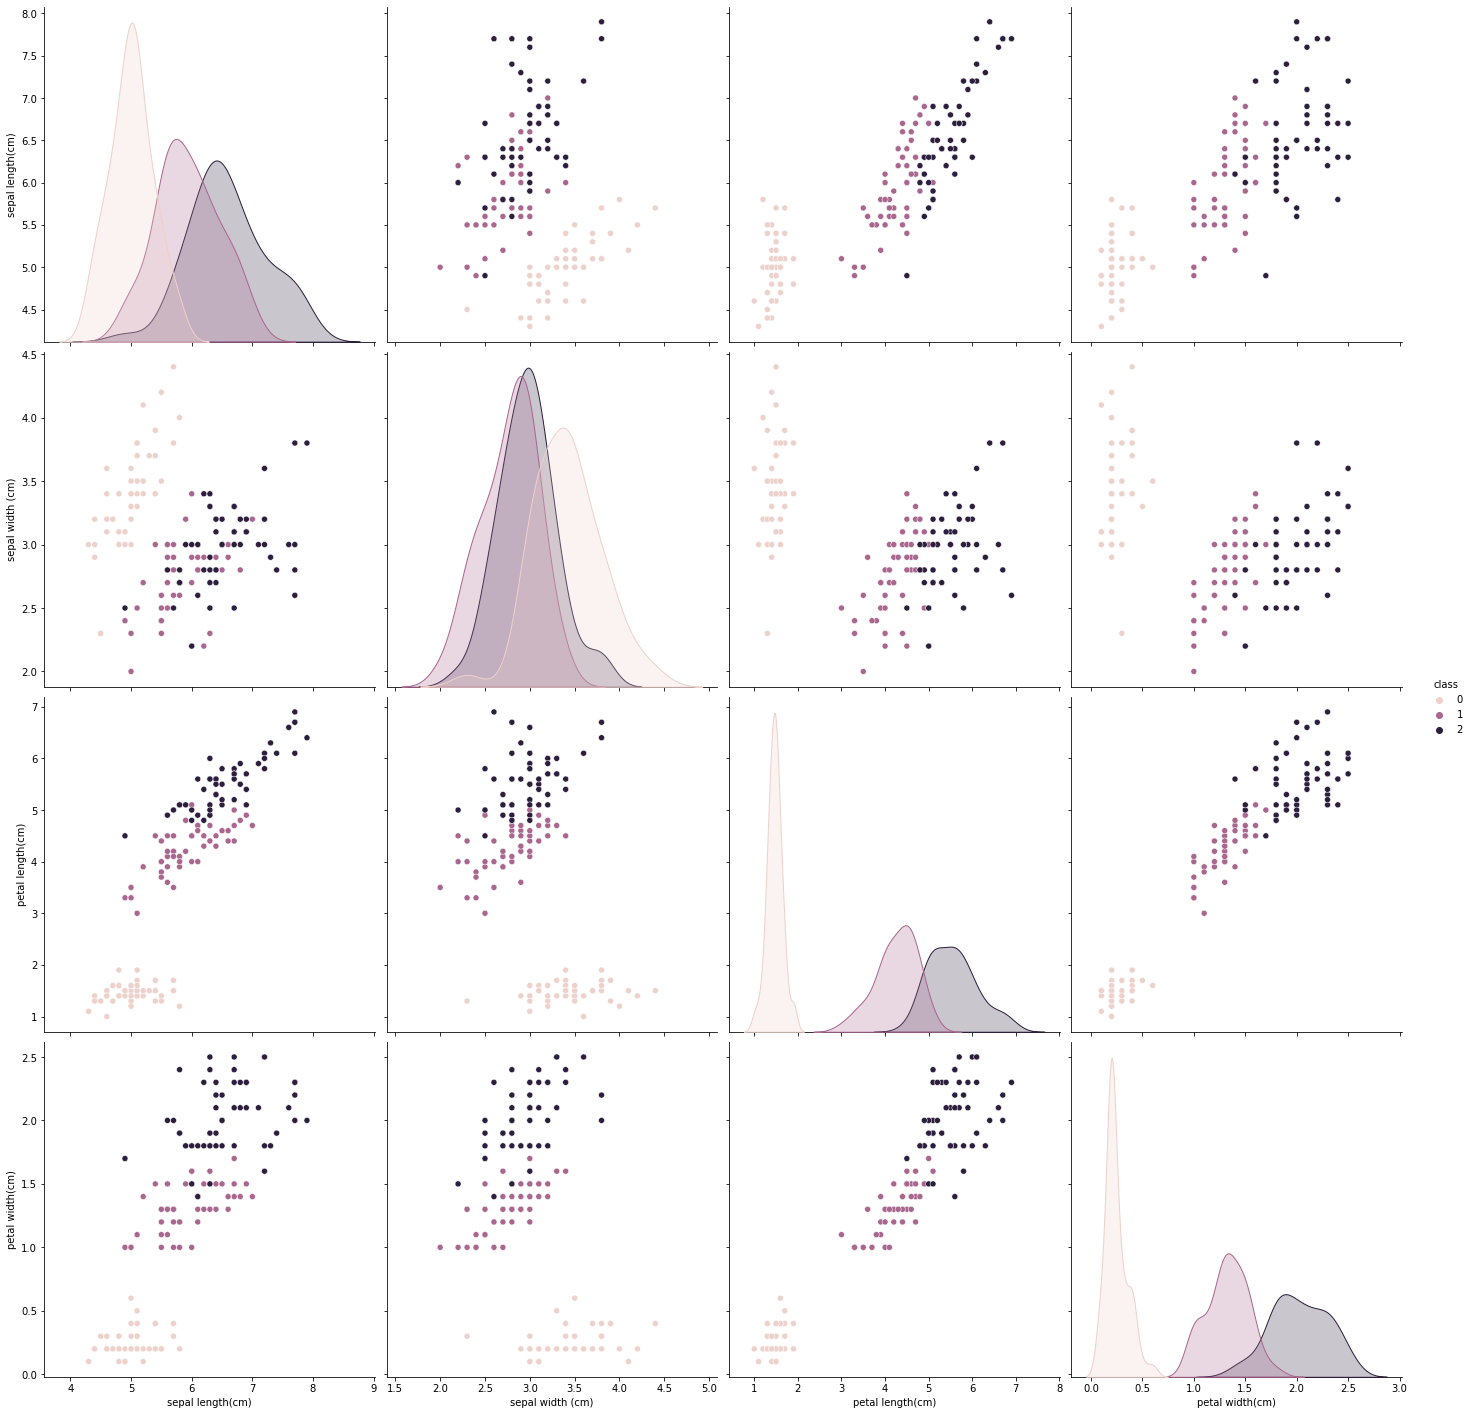

In [34]:
sns.pairplot(data, hue='class',height = 5)
plt.show()